# Task 1:

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
np.random.seed(51)

fruit_choices = ['Mango', 'Apple', 'Orange', 'Banana', 'Grapes']
dual_mode_nominal_data = pd.DataFrame({
    'ParticipantID': range(1, 2001),
    'FavoriteFruit': np.random.choice(
        fruit_choices, 1950, p=[0.4, 0.05, 0.1, 0.3, 0.15]
    ).tolist() + [None] * 50  # Adding 50 missing values
})
dual_mode_nominal_data

,ParticipantID,FavoriteFruit
0,1,Banana
1,2,Mango
2,3,Mango
3,4,Banana
4,5,Mango
...,...,...
1995,1996,None
1996,1997,None
1997,1998,None
1998,1999,None


In [18]:
# Shuffle the dataset to ensure randomness and reset index
shuffled_data = dual_mode_nominal_data.sample(frac=1, random_state=50).reset_index(drop=True)
shuffled_data

,ParticipantID,FavoriteFruit
0,566,Orange
1,1224,Banana
2,1582,Banana
3,960,Banana
4,1975,None
...,...,...
1995,1314,Mango
1996,110,Banana
1997,1932,Mango
1998,1505,Mango


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


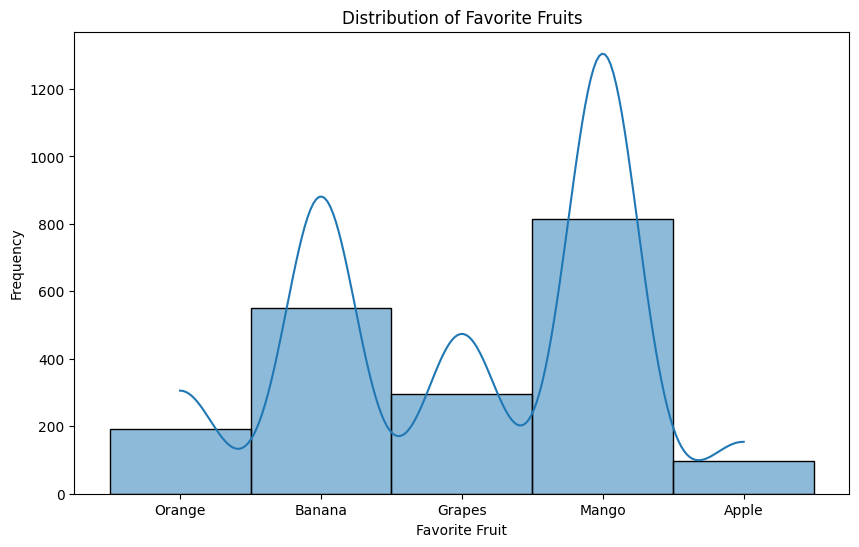

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data=shuffled_data['FavoriteFruit'], kde=True)
plt.title('Distribution of Favorite Fruits')
plt.xlabel('Favorite Fruit')
plt.ylabel('Frequency')
plt.show()

In [20]:
# Replace missing values with the most frequent fruit
mode_fruit = shuffled_data['FavoriteFruit'].mode()[0]
shuffled_data['FavoriteFruit'].fillna(mode_fruit, inplace=True)
mode_fruit

/tmp/ipykernel_30/3293639703.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  shuffled_data['FavoriteFruit'].fillna(mode_fruit, inplace=True)


'Mango'

In [21]:
missing_values_count = shuffled_data['FavoriteFruit'].isnull().sum()
missing_values_count

0

In [22]:
print("First few rows of the dataset after mode imputation:")
print(shuffled_data.head())
print(f"Missing values count: {missing_values_count}")

First few rows of the dataset after mode imputation:
   ParticipantID FavoriteFruit
0            566        Orange
1           1224        Banana
2           1582        Banana
3            960        Banana
4           1975         Mango
Missing values count: 0


# Task 2:

In [23]:
np.random.seed(5)

product_ratings = pd.DataFrame({
    'ProductID': range(1, 2001),
    'Category': np.random.choice(['Electronics', 'Clothing', 'Furniture', 'Books'], 2000),
    'Rating': np.concatenate((
        np.random.choice([1, 2, 3, 4, 5], 1970, p=[0.1, 0.2, 0.4, 0.2, 0.1]),  # Ratings distribution
        [np.nan] * 30  # Missing values
    ))
})
product_ratings

,ProductID,Category,Rating
0,1,Books,4.0
1,2,Furniture,3.0
2,3,Books,1.0
3,4,Clothing,1.0
4,5,Furniture,3.0
...,...,...,...
1995,1996,Furniture,NaN
1996,1997,Furniture,NaN
1997,1998,Clothing,NaN
1998,1999,Clothing,NaN


In [26]:
# Handling missing values per category by replacing them with the mean rating of their category
product_ratings['Rating'] = product_ratings.groupby('Category')['Rating'].transform(lambda x: x.fillna(x.mean()))
missing_values_count = product_ratings['Rating'].isnull().sum()

In [27]:
print("First few rows of the dataset after handling missing values:")
print(product_ratings.head())
print(f"Missing values count: {missing_values_count}")

First few rows of the dataset after handling missing values:
   ProductID   Category  Rating
0          1      Books     4.0
1          2  Furniture     3.0
2          3      Books     1.0
3          4   Clothing     1.0
4          5  Furniture     3.0
Missing values count: 0
